# Deep Learning (AI302)

## Lab Practical - 2

Angela Dutta \
U23AI006

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape for CNN
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


### Task 1: The Activation Function Challenge

### CNN with Sigmoid Activation

In [3]:
model_sigmoid = models.Sequential([
    layers.Conv2D(32, (3,3), activation='sigmoid', input_shape=(28,28,1)),
    layers.Conv2D(64, (3,3), activation='sigmoid'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='sigmoid'),
    layers.Dense(10, activation='softmax')
])

model_sigmoid.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_sigmoid = model_sigmoid.fit(
    x_train, y_train,
    epochs=10,
    validation_data=(x_test, y_test)
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.1034 - loss: 2.3183 - val_accuracy: 0.1483 - val_loss: 2.3056
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1070 - loss: 2.3056 - val_accuracy: 0.0982 - val_loss: 2.3137
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1092 - loss: 2.3048 - val_accuracy: 0.2058 - val_loss: 2.3004
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1051 - loss: 2.3042 - val_accuracy: 0.1135 - val_loss: 2.3020
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.1127 - loss: 2.3018 - val_accuracy: 0.1141 - val_loss: 2.2911
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1482 - loss: 2.2792 - val_accuracy: 0.4744 - val_loss: 1.9317
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6451 - loss: 1.4376 - val_accuracy: 0.8663 - val_loss: 0.5466
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8610 - loss: 0.5196 -

In [4]:
model_sigmoid.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,884 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

### CNN with tanh Activation

In [6]:
model_tanh = models.Sequential([
    layers.Conv2D(32, (3,3), activation='tanh', input_shape=(28,28,1)),
    layers.Conv2D(64, (3,3), activation='tanh'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='tanh'),
    layers.Dense(10, activation='softmax')
])

model_tanh.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_tanh = model_tanh.fit(
    x_train, y_train,
    epochs=10,
    validation_data=(x_test, y_test)
)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8224 - loss: 0.6499 - val_accuracy: 0.9378 - val_loss: 0.2089
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9376 - loss: 0.2150 - val_accuracy: 0.9546 - val_loss: 0.1542
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9553 - loss: 0.1539 - val_accuracy: 0.9660 - val_loss: 0.1177
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9644 - loss: 0.1237 - val_accuracy: 0.9705 - val_loss: 0.1026
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9706 - loss: 0.1016 - val_accuracy: 0.9742 - val_loss: 0.0872
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9748 - loss: 0.0896 - val_accuracy: 0.9784 - val_loss: 0.0761
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9790 - loss: 0.0757 - val_accuracy: 0.9797 - val_loss: 0.0702
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9801 - loss: 0.0706 -

In [7]:
model_tanh.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,884 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

### CNN with ReLU Activation

In [9]:
model_relu = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_relu.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_relu = model_relu.fit(
    x_train, y_train,
    epochs=10,
    validation_data=(x_test, y_test)
)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7217 - loss: 0.8644 - val_accuracy: 0.9399 - val_loss: 0.1975
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9393 - loss: 0.1998 - val_accuracy: 0.9652 - val_loss: 0.1133
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9609 - loss: 0.1303 - val_accuracy: 0.9738 - val_loss: 0.0865
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9714 - loss: 0.0948 - val_accuracy: 0.9788 - val_loss: 0.0658
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9764 - loss: 0.0774 - val_accuracy: 0.9834 - val_loss: 0.0569
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9806 - loss: 0.0611 - val_accuracy: 0.9837 - val_loss: 0.0542
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9838 - loss: 0.0534 - val_accuracy: 0.9835 - val_loss: 0.0517
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9847 - loss: 0.0485 -

In [10]:
model_relu.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,884 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [28]:
print("Training Accuracies:")
print("Sigmoid :", history_sigmoid.history['accuracy'][-1])
print("Tanh    :", history_tanh.history['accuracy'][-1])
print("ReLU    :", history_relu.history['accuracy'][-1])

Training Accuracies:
Sigmoid : 0.8986666798591614
Tanh    : 0.9854999780654907
ReLU    : 0.9889333248138428


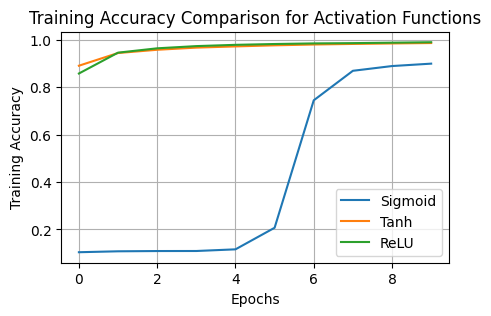

In [26]:
plt.figure(figsize=(5, 3))

plt.plot(history_sigmoid.history['accuracy'], label='Sigmoid')
plt.plot(history_tanh.history['accuracy'], label='Tanh')
plt.plot(history_relu.history['accuracy'], label='ReLU')

plt.xlabel("Epochs")
plt.ylabel("Training Accuracy")
plt.title("Training Accuracy Comparison for Activation Functions")
plt.legend()
plt.grid(True)
plt.show()


In [29]:
print("Training Loss:")
print("Sigmoid :", history_sigmoid.history['loss'][-1])
print("Tanh    :", history_tanh.history['loss'][-1])
print("ReLU    :", history_relu.history['loss'][-1])

Training Loss:
Sigmoid : 0.345669150352478
Tanh    : 0.05341819301247597
ReLU    : 0.03648180514574051


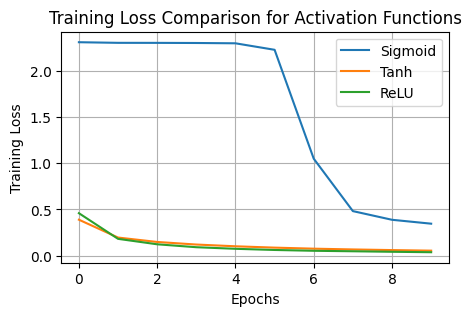

In [27]:
plt.figure(figsize=(5, 3))

plt.plot(history_sigmoid.history['loss'], label='Sigmoid')
plt.plot(history_tanh.history['loss'], label='Tanh')
plt.plot(history_relu.history['loss'], label='ReLU')

plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.title("Training Loss Comparison for Activation Functions")
plt.legend()
plt.grid(True)
plt.show()


### Task 2: The Optimizer Showdown

### SGD Optimizer

In [14]:
model_sgd = models.clone_model(model_relu)
model_sgd.compile(
    optimizer=optimizers.SGD(learning_rate=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_sgd = model_sgd.fit(
    x_train, y_train,
    epochs=10,
    validation_data=(x_test, y_test)
)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7315 - loss: 0.8708 - val_accuracy: 0.9369 - val_loss: 0.2118
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9398 - loss: 0.2038 - val_accuracy: 0.9640 - val_loss: 0.1229
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9600 - loss: 0.1365 - val_accuracy: 0.9713 - val_loss: 0.0915
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9699 - loss: 0.0995 - val_accuracy: 0.9739 - val_loss: 0.0799
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9771 - loss: 0.0761 - val_accuracy: 0.9822 - val_loss: 0.0574
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9817 - loss: 0.0619 - val_accuracy: 0.9832 - val_loss: 0.0508
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9836 - loss: 0.0568 - val_accuracy: 0.9839 - val_loss: 0.0480
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9862 - loss: 0.0445 -

### SGD with Momentum Optimizer

In [15]:
model_momentum = models.clone_model(model_relu)
model_momentum.compile(
    optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.9),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_momentum = model_momentum.fit(
    x_train, y_train,
    epochs=10,
    validation_data=(x_test, y_test)
)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8723 - loss: 0.4044 - val_accuracy: 0.9818 - val_loss: 0.0569
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9810 - loss: 0.0592 - val_accuracy: 0.9859 - val_loss: 0.0400
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9891 - loss: 0.0365 - val_accuracy: 0.9874 - val_loss: 0.0363
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9924 - loss: 0.0259 - val_accuracy: 0.9870 - val_loss: 0.0394
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9938 - loss: 0.0196 - val_accuracy: 0.9879 - val_loss: 0.0383
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9961 - loss: 0.0128 - val_accuracy: 0.9897 - val_loss: 0.0316
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9963 - loss: 0.0116 - val_accuracy: 0.9884 - val_loss: 0.0353
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9973 - loss: 0.0088 -

### Adam Optimizer

In [16]:
model_adam = models.clone_model(model_relu)
model_adam.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_adam = model_adam.fit(
    x_train, y_train,
    epochs=10,
    validation_data=(x_test, y_test)
)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9182 - loss: 0.2604 - val_accuracy: 0.9855 - val_loss: 0.0446
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9876 - loss: 0.0402 - val_accuracy: 0.9883 - val_loss: 0.0337
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9923 - loss: 0.0247 - val_accuracy: 0.9878 - val_loss: 0.0402
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9938 - loss: 0.0188 - val_accuracy: 0.9908 - val_loss: 0.0303
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9963 - loss: 0.0120 - val_accuracy: 0.9884 - val_loss: 0.0421
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9973 - loss: 0.0085 - val_accuracy: 0.9894 - val_loss: 0.0394
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9972 - loss: 0.0089 - val_accuracy: 0.9903 - val_loss: 0.0409
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9971 - loss: 0.0088 

### Task 3


### WITHOUT Batch normalization and drop out layer

In [17]:
model_no_bn = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_no_bn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_no_bn = model_no_bn.fit(
    x_train, y_train,
    epochs=10,
    validation_data=(x_test, y_test)
)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9235 - loss: 0.2545 - val_accuracy: 0.9853 - val_loss: 0.0462
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9883 - loss: 0.0378 - val_accuracy: 0.9888 - val_loss: 0.0340
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9935 - loss: 0.0210 - val_accuracy: 0.9897 - val_loss: 0.0319
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9958 - loss: 0.0132 - val_accuracy: 0.9897 - val_loss: 0.0339
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9969 - loss: 0.0098 - val_accuracy: 0.9896 - val_loss: 0.0413
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9972 - loss: 0.0079 - val_accuracy: 0.9891 - val_loss: 0.0410
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9983 - loss: 0.0055 - val_accuracy: 0.9886 - val_loss: 0.0518
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9981 - loss: 0.0057 -

### Without BN, drop out layer=0.1

In [18]:
model_drop_01 = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.1),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_drop_01.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_drop_01 = model_drop_01.fit(
    x_train, y_train,
    epochs=10,
    validation_data=(x_test, y_test)
)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9247 - loss: 0.2448 - val_accuracy: 0.9863 - val_loss: 0.0428
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9874 - loss: 0.0395 - val_accuracy: 0.9855 - val_loss: 0.0464
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9924 - loss: 0.0229 - val_accuracy: 0.9870 - val_loss: 0.0424
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9955 - loss: 0.0139 - val_accuracy: 0.9884 - val_loss: 0.0401
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9967 - loss: 0.0103 - val_accuracy: 0.9908 - val_loss: 0.0343
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9969 - loss: 0.0092 - val_accuracy: 0.9910 - val_loss: 0.0374
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9974 - loss: 0.0076 - val_accuracy: 0.9901 - val_loss: 0.0407
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9986 - loss: 0.0043

### With BN, drop out layer=0.25

In [19]:
model_bn = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_bn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_bn = model_bn.fit(
    x_train, y_train,
    epochs=10,
    validation_data=(x_test, y_test)
)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9261 - loss: 0.2973 - val_accuracy: 0.9796 - val_loss: 0.0668
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9835 - loss: 0.0574 - val_accuracy: 0.9789 - val_loss: 0.0804
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9873 - loss: 0.0444 - val_accuracy: 0.9798 - val_loss: 0.0813
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9904 - loss: 0.0338 - val_accuracy: 0.9855 - val_loss: 0.0534
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9928 - loss: 0.0236 - val_accuracy: 0.9872 - val_loss: 0.0561
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9930 - loss: 0.0242 - val_accuracy: 0.9842 - val_loss: 0.0653
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9948 - loss: 0.0165 - val_accuracy: 0.9883 - val_loss: 0.0512
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9965 - loss: 0.0109 -

### Comparison

In [30]:
import pandas as pd

data = {
    "Activation": ["Sigmoid", "Tanh", "ReLU", "ReLU", "ReLU"],
    "Optimizer": ["SGD", "SGD", "SGD", "SGD + Momentum", "Adam"],
    "Final Accuracy": [
        history_sigmoid.history['val_accuracy'][-1],
        history_tanh.history['val_accuracy'][-1],
        history_relu.history['val_accuracy'][-1],
        history_momentum.history['val_accuracy'][-1],
        history_adam.history['val_accuracy'][-1]
    ]
}

df = pd.DataFrame(data)
df

,Activation,Optimizer,Final Accuracy
0,Sigmoid,SGD,0.9137
1,Tanh,SGD,0.9839
2,ReLU,SGD,0.9863
3,ReLU,SGD + Momentum,0.9912
4,ReLU,Adam,0.9903


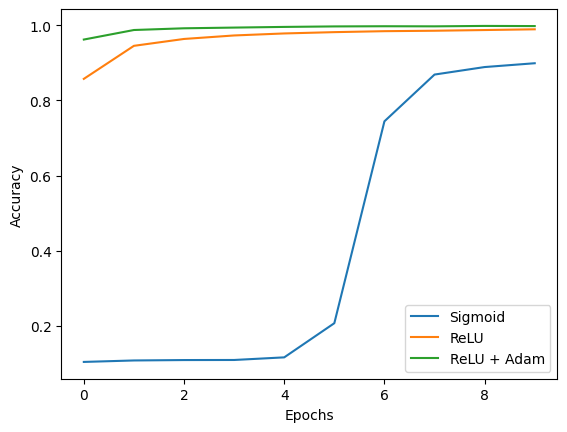

In [22]:
plt.plot(history_sigmoid.history['accuracy'], label='Sigmoid')
plt.plot(history_relu.history['accuracy'], label='ReLU')
plt.plot(history_adam.history['accuracy'], label='ReLU + Adam')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()